In [1]:
import glob
import numpy as np
import os
import matplotlib.pyplot as plt

from utils import TrafficAssignment

In [3]:

#read data
instance_name = "SiouxFalls" # "sample" # 
file_path = f'network_data/{instance_name}/network_net.csv'
node_attr = f'network_data/{instance_name}/network_node.csv'

N_iter = 500 # number of iterations
eps = 1e-8 # tolerance
algorithm_name = "FW" # Frank-Wolfe algorithm or "MSA": Method of Successive Averages

# set up the results folder
if not os.path.exists(f'results/{instance_name}'):
    os.makedirs(f'results/{instance_name}')

with open(f'results/{instance_name}/results_{algorithm_name}.csv', 'w') as f:
    for od_path in glob.glob(f"network_data/{instance_name}/network_od*.csv"):

        model = TrafficAssignment(file_path, od_path, node_attr, instance_name, algorithm_name, eps) # set up the model

        # record the relative gap and the number of iterations
        gaps_FW=[]
        n_iters_FW=[]

        while (not model.converged) and model.iteration<N_iter:
            gap = model.step(metric="relative_gap",search_method = "exact")
            # graph = model.get_graph()
            gaps_FW.append(gap)
            n_iters_FW.append(model.iteration)
            if model.iteration % 100 == 0:
                print('iteration: {}, gap: {}'.format(model.iteration, gap))
            # record iteration and solution
            f.write(f"{model.iteration},{gap},{np.sum(model.UE_sol)}\n")

        break # only run one OD pair

iteration: 100, gap: 0.001271402753334483
iteration: 200, gap: 0.0005924588471515335
iteration: 300, gap: 0.0003842691783162433
iteration: 400, gap: 0.0002854778645082767
iteration: 500, gap: 0.0002284764892124258


In [4]:
sum(model.UE_sol)

4232302.047738518

In [5]:
# then we run the MSA algorithm
algorithm_name = "MSA" # Frank-Wolfe algorithm or "MSA": Method of Successive Averages

with open(f'results/{instance_name}/results_{algorithm_name}.csv', 'w') as f:
    for od_path in glob.glob(f"network_data/{instance_name}/network_od*.csv"):

        model = TrafficAssignment(file_path, od_path, node_attr, instance_name, algorithm_name, eps) # set up the model

        # record the relative gap and the number of iterations
        gaps_MSA=[]
        n_iters_MSA=[]

        while (not model.converged) and model.iteration<N_iter:
            gap = model.step(metric="relative_gap",search_method = "bisection")
            # graph = model.get_graph()
            gaps_MSA.append(gap)
            n_iters_MSA.append(model.iteration)
            if model.iteration % 100 == 0:
                print('iteration: {}, gap: {}'.format(model.iteration, gap))
            # record iteration and solution
            f.write(f"{model.iteration},{gap},{np.sum(model.UE_sol)}\n")

        break # only run one OD pair    

iteration: 100, gap: 0.02457992641700435
iteration: 200, gap: 0.012158078431931285
iteration: 300, gap: 0.008076842167423326
iteration: 400, gap: 0.006046947559947391
iteration: 500, gap: 0.004832155069613542


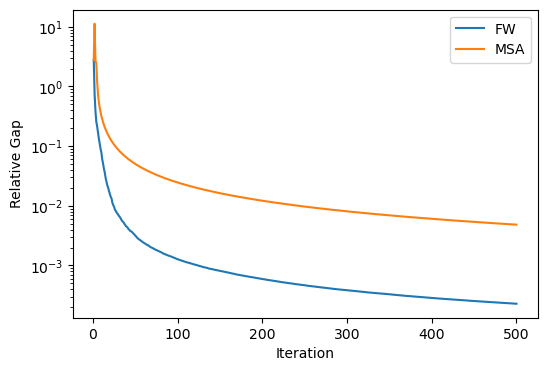

In [6]:
fig,ax=plt.subplots(figsize=(6,4))
ax.plot(n_iters_FW,gaps_FW,label='FW')
ax.plot(n_iters_MSA,gaps_MSA,label='MSA')
ax.set_yscale('log')
ax.set_xlabel('Iteration')
ax.set_ylabel('Relative Gap')
ax.legend()

In [7]:
import networkx as nx

['4576.20', '8154.80', '4553.60', '6005.80', '8177.40', '14160.60', '10163.80', '5983.20', '8798.60', '12550.60', '14146.40', '18128.40', '5348.20', '10200.60', '8384.80', '12541.80', '18110.40', '8800.60', '15860.20', '5252.00', '17759.00', '8412.40', '9833.60', '15844.20', '6900.20', '21881.60', '12526.00', '12142.20', '6854.60', '8416.60', '12088.20', '15941.00', '15887.00', '15467.40', '19114.80', '8400.40', '11055.20', '11671.20', '15528.60', '21811.20', '17636.20', '23228.40', '11085.00', '8125.80', '23172.60', '9045.60', '19163.20', '18383.60', '8118.20', '11686.40', '9952.00', '9787.80', '9109.80', '8384.60', '12451.00', '11120.60', '11129.80', '10310.60', '7952.40', '8403.00', '9668.80', '7903.20', '19130.20', '9959.60', '8710.80', '18396.60', '7044.20', '8682.60', '9638.00', '19099.60', '8685.40', '6293.60', '7049.00', '6357.80', '8660.00', '10269.00']


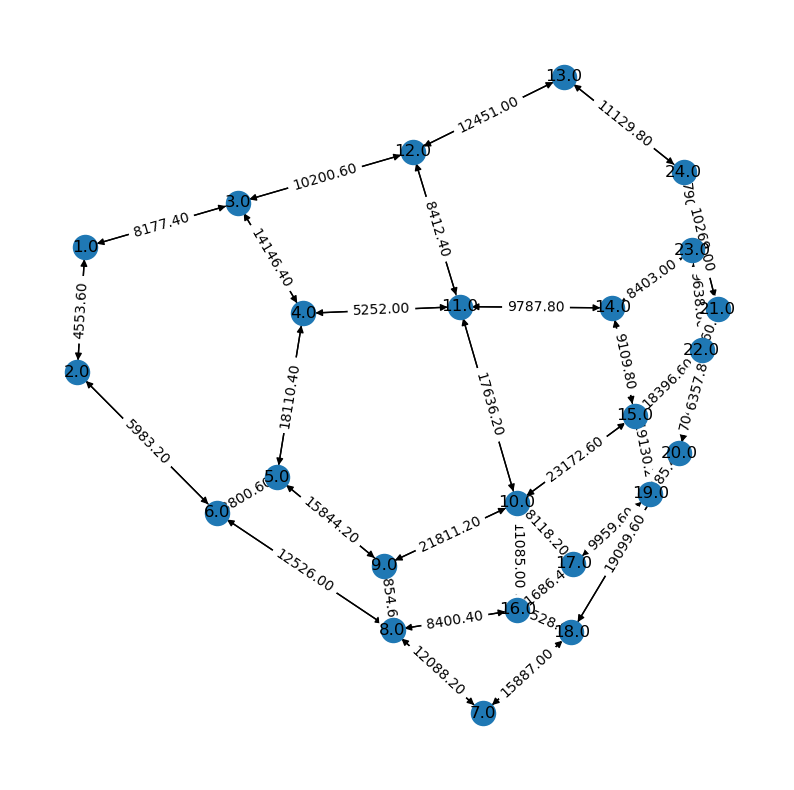

In [8]:
# Format the link_flow values to display with 2 digits
formatted_link_flow = [f'{flow:.2f}' for flow in model.link_flow]
print(formatted_link_flow)

# Create the plot
fig, ax = plt.subplots(figsize=(10,10))
G = model.get_graph()
pos = nx.spectral_layout(G)

# Draw the graph with labels
nx.draw(G, pos, with_labels=True)

# Add node labels
node_labels = nx.get_node_attributes(G, 'name')
nx.draw_networkx_labels(G, pos, labels=node_labels)

# Add edge labels
edge_labels = nx.get_edge_attributes(G, 'travel_flow')

# Format edge labels to display with 2 digits
formatted_edge_labels = {edge: f'{flow:.2f}' for edge, flow in edge_labels.items()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=formatted_edge_labels)

# Show the plot
plt.show()


### Additional code for bisection search method

In [ ]:
#bisection  f=1+3x
def fun(x1,x2,lbd):
    x=(1-lbd)*x1+lbd*x2
    z=(1+3*x)@(x2-x1)
    return z
lbd=0.3
x1=np.array([2,3])
x2=np.array([3,2])
fun(x1,x2,lbd)

-1.2000000000000002

In [ ]:
def bisect(x1,x2,a,b,eps=1e-3):
    if abs(a-b)<1e-3:
        return abs(b-a)/2
    else:
        print(a,b)
        f1=fun(x1,x2,a)
        f2=fun(x1,x2,b)
        c=a+(b-a)/2
        print(c)
        f3=fun(x1,x2,c)
        if f3>0:
            a=c
        else:
            b=c
        return bisect(x1,x2,a,b)

In [ ]:
lbda=bisect(x1,x2,0,1)

0 1
0.5
0 0.5
0.25
0 0.25
0.125
0 0.125
0.0625
0 0.0625
0.03125
0 0.03125
0.015625
0 0.015625
0.0078125
0 0.0078125
0.00390625
0 0.00390625
0.001953125
0 0.001953125
0.0009765625
